# <font color=black>Key</font> 
### <font color=#ff5c33>Intermediate To Do Steps  (blocks)</font>
### <font color=#f4d942>looking around (eda)</font> 
### <font color=blue>Answer cell</font>

In [434]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# <font color=#ff5c33>Answer 3 member related questions: 
1. different top stations for male vs female? --done
2. are all rentals after 2am by riders under 25? -- done
3. which station gets most tourist traffic vs most commuters?
4. extra (not required) -- add seasonality idenfity season of year for rides
5. extra (not required) -- pull in weather data</font>
 


In [435]:
df = pd.read_csv('Data/201712-hubway-tripdata.csv')

In [436]:
# reset gender column to male & female from randomn nuumbers
df['gender'] = np.where(df.gender==1,'male',np.where(df.gender==2,'female','unknown'))

In [437]:
# make column names one word & remove spaces to make acessing values easier
columns = []
for column in df.columns:
    columns.append(column.replace(' ','_'))
df.columns = columns 

## <font color=#ff5c33>set timeseries index & convert to datetime object</font>

In [438]:
# convert start, stop times & set index
df['starttime'] = pd.to_datetime(df.starttime)
df['stoptime'] = pd.to_datetime(df.stoptime)
df.set_index('starttime',inplace=True)

In [439]:
df.head(3)

,tripduration,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
starttime,,,,,,,,,,,,,,
2017-12-01 00:02:02,200,2017-12-01 00:05:22,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,1938,Subscriber,1982,unknown
2017-12-01 00:06:14,365,2017-12-01 00:12:20,226,Commonwealth Ave At Babcock St,42.351547,-71.121262,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,57,Subscriber,1997,male
2017-12-01 00:09:08,297,2017-12-01 00:14:06,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,76,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,1201,Subscriber,1977,male


## <font color=#ff5c33>get user age</font>

## <font color=#f4d942>checkout age data</font>

In [444]:
print(type(df.birth_year[0]))
print(df.birth_year.notnull().sum())
print(df.birth_year.str.isnumeric().sum())

<class 'str'>
55072
52952


In [445]:
# convert birth year to integer & calculate age at time of rental
def birth_year(year):
    """ converts year string to int or NaN if not numeric"""
    if year.isnumeric():
        return(int(year))
    else:
        return(0) # will create 0 ints and 2017 age values--later removed 

df['birth_year'] = df.birth_year.apply(lambda x: birth_year(x))
df['age'] = df.index.year - df.birth_year

In [447]:
# checkout age data
print(type(df.birth_year[0]))
print(df.birth_year.value_counts().tail())
print(df[df.age>80].age.unique())

<class 'numpy.int64'>
1945    6
1929    6
1900    5
1937    4
1886    1
Name: birth_year, dtype: int64
[2017   83   88  131  117]


##  <font color=#ff5c33> create df with ages over 99 removed </font>

In [448]:
df_99 = df[df.age<100]

## <font color=#f4d942>checkout age & gender distribution</font>

/Users/babilalima/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


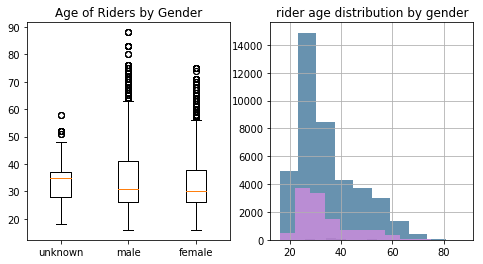

In [450]:
sex_color = {'unknown':'#8d9093','male':'#04497a','female':'#f28aee',}

fig,ax = plt.subplots(1,2,figsize=(8,4))

ax = ax.flatten()
data = []
labels = []
for sex in df_99.gender.unique():
    data.append(df_99[df_99.gender==sex].age)
    labels.append(sex)
ax[0].boxplot(data,labels=labels);
ax[0].set_title('Age of Riders by Gender')
    
for sex in df.gender.unique():
    ax[1] = df_99[df_99.gender==sex].age.\
    hist(label=sex,color=sex_color[sex],alpha=.6)
ax[1].set_title('rider age distribution by gender');

## <font color=#f4d942>ridership trends?</font>

peak hour ridership is 6548 riders.


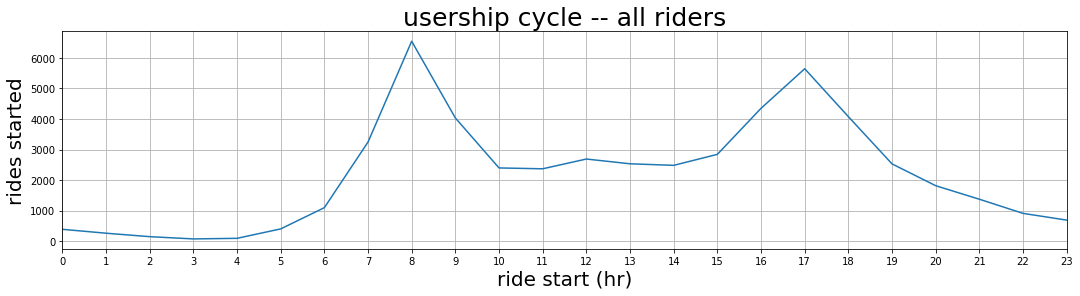

In [451]:
fig,ax = plt.subplots(figsize=(18,4))
labels = np.arange(df_99.index.hour.min(),df_99.index.hour.max()+1)

x = df_99.groupby(df_99.index.hour).start_station_id.count().plot();
print('peak hour ridership is {} riders.'.\
      format(df_99.groupby(df_99.index.hour).\
             start_station_id.count().max()))
plt.xlabel('ride start (hr)',fontsize=20)
plt.ylabel('rides started',fontsize=20)
plt.title('usership cycle -- all riders',fontsize=25);
ax.xaxis.set_major_locator((plt.MaxNLocator(df_99.index.hour.max())))
ax.set_xticklabels(labels)
plt.grid();

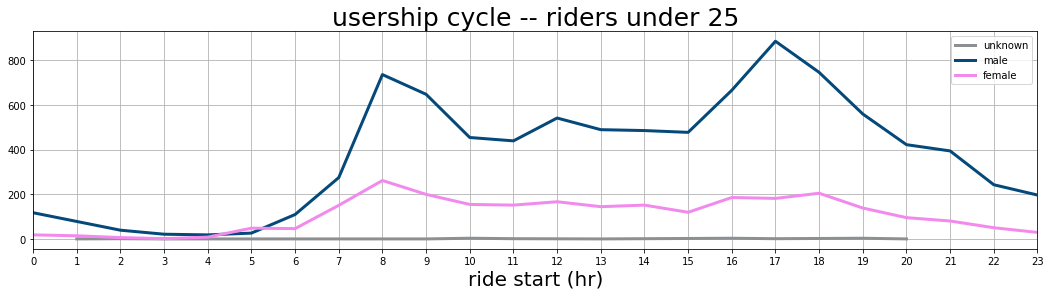

In [333]:
fig,ax = plt.subplots(figsize=(18,4))
for sex in df_99.gender.unique():
    df_99[(df_99.age<=25)&(df_99.gender==sex)].\
    groupby(df_99[(df_99.age<=25)&(df_99.gender==sex)].\
            index.hour).start_station_id.count().\
    plot(label=sex,color=sex_color[sex],lw=3)
plt.legend();
plt.title('usership cycle -- riders under 25',fontsize=25)
ax.xaxis.set_major_locator((plt.MaxNLocator(df_99.index.hour.max())))
ax.set_xticklabels(labels)
plt.xlabel('ride start (hr)',fontsize=20)
plt.grid();

/Users/babilalima/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


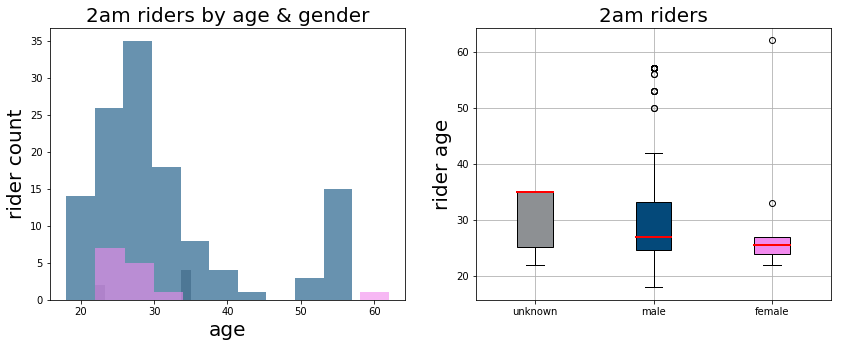

In [381]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax = ax.flatten()
for sex in df_99.gender.unique():
    ax[0].hist(df_99[(df_99.gender==sex)&(df_99.index.hour==2)].age,\
               color=sex_color[sex],alpha=.6)
    
data = []
labels = []
for sex in df_99.gender.unique():
    data.append(df_99[(df_99.gender==sex)&(df_99.index.hour==2)].age)
    labels.append(sex)
    bxplt = ax[1].boxplot(data,labels=labels,patch_artist=True)

for patch,sex in zip(bxplt['boxes'],sex_color.keys()):
    patch.set_facecolor(sex_color[sex])
    
for patch in bxplt['medians']:
    patch.set_color('red')
    patch.set_linestyle('-')
    patch.set_linewidth(2)

ax[0].set_title('2am riders by age & gender',fontsize=20)
ax[0].set_xlabel('age',fontsize=20)
ax[0].set_ylabel('rider count',fontsize=20)
ax[1].set_title('2am riders',fontsize=20)
ax[1].set_ylabel('rider age',fontsize=20)
ax[1].grid()

## <font color=blue>are all rentals at 2am riders under 25?</font>

In [473]:
for sex in df_99.gender.unique():
    print('{:.2f}% of all 2am riders under 25 yrs old are gendered: {}.'.\
          format((df_99[(df_99.age<25)&(df_99.gender==sex)].\
                  tripduration.count() /\
                  df_99.tripduration.count())*100,sex))

0.05% of all 2am riders under 25 yrs old are gendered: unknown.
13.05% of all 2am riders under 25 yrs old are gendered: male.
3.81% of all 2am riders under 25 yrs old are gendered: female.


## <font color=#f4d942>looking at popular stations</font>

In [452]:
df_pivot1 = pd.pivot_table(df[df.gender!='unknown'],values=['tripduration'],\
              index='start_station_name',columns=['gender'],\
              aggfunc={'tripduration':['count','sum','mean']})

In [453]:
df_pivot1.sort_values(by=('tripduration','count','male'),\
                      ascending=False).head(7)

tripduration                       \
                                               count                 mean   
gender                                        female    male       female   
start_station_name                                                          
MIT at Mass Ave / Amherst St                   357.0  1627.0   583.221289   
MIT Stata Center at Vassar St / Main St        271.0  1221.0   583.022140   
South Station - 700 Atlantic Ave               199.0  1175.0   804.703518   
Kendall T                                      238.0  1044.0  1728.953782   
MIT Vassar St                                  117.0   916.0   605.341880   
MIT Pacific St at Purrington St                237.0   899.0   513.067511   
Central Square at Mass Ave / Essex St          273.0   888.0   613.890110   

                                                                         
                                                          sum            
gender                                         male    female      male  
start_station_name                                                       
MIT at Mass Ave / Amherst St             530.872772  208210.0  863730.0  
MIT Stata Center at Vassar St / Main St  574.217854  157999.0  701120.0  
South Station - 700 Atlantic Ave         597.474043  160136.0  702032.0  
Kendall T                                495.035441  411491.0  516817.0  
MIT Vassar St                            499.851528   70825.0  457864.0  
MIT Pacific St at Purrington St          446.032258  121597.0  400983.0  
Central Square at Mass Ave / Essex St    636.984234  167592.0  565642.0

## <font color=blue>top stations for male vs female members</font>

In [21]:
print('\nMale Top 5 Stations by Ride Initiation Frequency:\n')
print(df_pivot1['tripduration']['count'].male.sort_values(ascending=False).head(5))
print('\nFemale Top 5 Stations by Ride Initiation Frequency:\n')
print(df_pivot1['tripduration']['count'].female.sort_values(ascending=False).head(5))


Male Top 5 Stations by Ride Initiation Frequency:

start_station_name
MIT at Mass Ave / Amherst St               1627.0
MIT Stata Center at Vassar St / Main St    1221.0
South Station - 700 Atlantic Ave           1175.0
Kendall T                                  1044.0
MIT Vassar St                               916.0
Name: male, dtype: float64

Female Top 5 Stations by Ride Initiation Frequency:

start_station_name
MIT at Mass Ave / Amherst St                   357.0
Central Square at Mass Ave / Essex St          273.0
MIT Stata Center at Vassar St / Main St        271.0
Copley Square - Dartmouth St at Boylston St    241.0
Kendall T                                      238.0
Name: female, dtype: float64


# <font color=red>Can we see the top 5 on a map? Anything interesting there?<font>